# AI CA2
name : sajjad pakdaman savoji
<br>
SID :  810195517

# Abstraction
In this computer assignment MiniMax algorithem was implemented alongside with $\alpha - \beta pruninig$.<br>
As the game described in assignment could be categorized as adversarial , MiniMax approach would be a candidate to tackle the task of action planning.In addition $\alpha - \beta pruninig$ could remarkebly improve this aforementioned algorithem.<br><br>
concept of these two approaches are shotly explained below:
* MiniMax : Minimax is a kind of backtracking algorithm that is used in decision making and game theory to find the optimal move for a player, assuming that your opponent also plays optimally. It is widely used in two player turn-based games such as Tic-Tac-Toe, Backgammon, Mancala, Chess, etc.
<br><br>In Minimax the two players are called maximizer and minimizer. The maximizer tries to get the highest score possible while the minimizer tries to do the opposite and get the lowest score possible.
<br><br>Every board state has a value associated with it. In a given state if the maximizer has upper hand then, the score of the board will tend to be some positive value. If the minimizer has the upper hand in that board state then it will tend to be some negative value. The values of the board are calculated by some heuristics which are unique for every 
type of game.
<br>
<img src = "minmax.jpg"> </img>
<br><br>

* $\alpha - \beta \: pruninig$ : alpha-Beta pruning is not actually a new algorithm, rather an optimization technique for minimax algorithm. It reduces the computation time by a huge factor. This allows us to search much faster and even go into deeper levels in the game tree. It cuts off branches in the game tree which need not be searched because there already exists a better move available. It is called Alpha-Beta pruning because it passes 2 extra parameters in the minimax function, namely alpha and beta.<br><br>
Let’s define the parameters alpha and beta.<br><br>
Alpha is the best value that the maximizer currently can guarantee at that level or above.<br><br>
Beta is the best value that the minimizer currently can guarantee at that level or above.
<br>
<img src = "alpha_beta.png"> </img>

# Modeling
For each agent the score corresponding to WIN is +1 and the score corresponding to LOSE is -1<br><br>
Two agent types are implemented: 
1. MinimaxPlayer : uses MinMax algorithm for "getMove" attribute
2. PrunerPlayer : uses $\alpha - \beta \: pruninig$ algorithm



In [ ]:
class MinimaxPlayer(Game, Player):
    def initialize(self, side , depth):
        self.side = side
        self.name = "minimax"
        self.depth = depth 
        
    def getMove(self, board):
        value , move = self.max_value(board , self.side , ROOT_DEPTH)
        return move

In [ ]:
class PrunerPlayer(MinimaxPlayer):
    def initialize(self, side , depth):
        self.side = side
        self.name = "pruner"
        self.depth = depth 
    def getMove(self, board):
        value , move = self.max_value(board , self.side , ROOT_DEPTH ,
                                      float('-inf') , float('inf'))
        return move

# Evaluation Function and Utility Function
Each leaf node had a value associated with it.But in the real world when we are creating a program to play Tic-Tac-Toe, Chess, Backgamon, etc. we need to implement a function that calculates the value of the board depending on the placement of pieces on the board. This function is often known as Evaluation Function. It is sometimes also called Heuristic Function.<br><br>
Noting that the moveability of pieces is much more important than the number of pieces for each agent , the evaluation function is denoted as followed :<br><br> 
$$
eval(s) = \frac{\text{moves possible for me} -\text{moves possible for opponent} }{\text{moves possible for me} + \text{moves possible for opponent}}
$$<br>
The afformentioned function is used as utility function as well

# Equality of actions chozen
$\alpha - \beta \: pruninig$ does NOT garentee that all middle node values being the same as MiniMax algorithm but the root value would be the same.<br><br>
Accepting the fact above , if $\alpha - \beta \: pruninig$ is called for successors of the decision point, by comaring them the optimal action would be uniquely determined 

# Timing and Comparison 

In [1]:
from game import *

In [43]:
max_depth = 5
min_depth = 1
max_dim = 8 
min_dim = 8

In [44]:
data_prun = stats(min_dim , max_dim , min_depth , max_depth , 1 , PrunerPlayer)

In [ ]:
data_minmax = stats(min_dim , max_dim ,min_depth , max_depth , 1 , MinimaxPlayer)

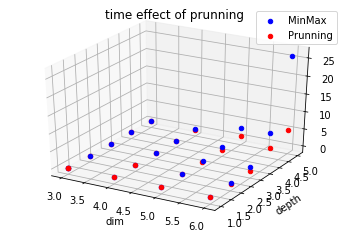

In [40]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter( min_dim , min_depth , data_minmax[0][0][0] , c = 'blue' , label = 'MinMax')
ax.scatter( min_dim , min_depth , data_prun[0][0][0] , c = 'red' , label = 'Prunning')
for i in range(min_dim , max_dim + 1):
    for j in range(min_depth , max_depth + 1):
        ax.scatter( i , j , data_minmax[i - min_dim][j - min_depth][0] , c = 'blue')
        ax.scatter( i , j , data_prun[i - min_dim][j - min_depth][0] , c = 'red')
        
plt.xlabel('dim')
plt.ylabel('depth')
plt.title('time effect of prunning')
plt.legend()
plt.show()

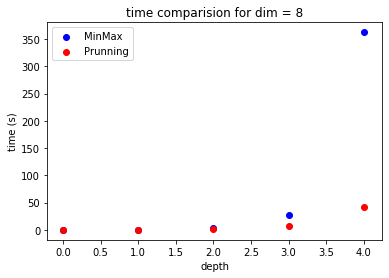

In [25]:
plt.scatter(0 , 0 , c = 'blue' , label = 'MinMax')
plt.scatter(0 , 0 , c = 'red' , label = 'Prunning')
for i in range(min_dim , max_dim + 1):
    for j in range(min_depth , max_depth + 1):
        plt.scatter( j , data_minmax[i - min_dim][j - min_depth][0] , c = 'blue')
        plt.scatter( j , data_prun[i - min_dim][j - min_depth][0] , c = 'red')
plt.legend()
plt.title('time comparision for dim = 8')
plt.xlabel('depth')
plt.ylabel('time (s)');
plt.show()

As illustrated above alpha-beta agents consumes much less time , therefor is more optimum to use